# MATH578 Homework 2
**Juan Carlos Apitz**

**ID 012523821**

In [1]:
from __future__ import division
import numpy
from numpy.linalg import norm
from numpy.linalg import inv
from pandas import DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1

### Part a)

***Define the Givens Routine:***

In [2]:
def givens(x):
    a, b, eps = (x[0],x[1],2**-52)
    if abs(a) < eps:
        c, s = (1,0)
    elif abs(b) > abs(a):
        tau = -a/b; s = 1./numpy.sqrt(1+tau*tau); c = tau*s 
    else:
        tau = -b/a; c = 1.0/numpy.sqrt(1+tau*tau); s = tau*c
    return (c,s)

***Define the QR factorization function using Givens rotations:***

If $A$ is tridiagonal, each sub-block containing columns with al least one non-zero entry is going to be the $2\times3$ sublock $A_{k:k+1,k:k+2}$. Thus each Givens rotation will consist of the following operation:
$$
\begin{bmatrix}
c,-s\\
s,\ \ c
\end{bmatrix}
\begin{bmatrix}
x,x,0\\
x,x,x
\end{bmatrix}
$$

In [3]:
def givens_qr(A, show=0):
    n = A.shape[0]                                      # initialize
    R = A.copy()                                        #
    V = numpy.zeros((n,2))                              #
    Q = numpy.identity(n)                               #
                                                        # loop to compute R                           
    for k in xrange(n-1):                               #
        sub = R.copy()[k:k+2,k:k+3]                     # this is the 2 by 3 block of non-zeros to operate on
        x = sub[:,0]                                    #
        c, s = givens(x)                                # compute components (c,s) of a Givens rotation
        V[k,:] = [c,s]                                  # store (c,s) at each step to perform backward acc.
        G = numpy.array([[c,-s],[s,c]])                 # form the Givens rotation
        R[k:k+2,k:k+3] = numpy.dot(G,sub)               # apply the Givens rotation to form R
                                                        # compute Q
    Q = numpy.identity(n)                               #
    for k in xrange(n-1,0,-1):                          #
        c, s = (V[k-1,0],V[k-1,1])                      #
        G = numpy.array([[c,-s],[s,c]])                 # form the Givens rotation
        Q[:,k-1:k+1] = numpy.dot(Q[:,k-1:k+1],G)        # backward accumulation step
                                                        # output
    if show == 1:                                       #
        print 'Q = \n{}'.format(DataFrame(data=Q.T))    #
        print '\nR = \n{}'.format(DataFrame(R))         #
    return {'Q':Q.T,'R':R,'V':V}                        #

*** Validate the function to calculate Givens QR using an arbitrary tridiagonal matrix:***

In [4]:
A = numpy.array([[2.,1,0,0,0,0],
                 [1.,2,1,0,0,0],
                 [0.,1,1,2,0,0],
                 [0.,0,2,1,1,0],
                 [0.,0,0,1,2,1],
                 [0.,0,0,0,1,1]])

***The resulting QR decomposition with Givens Rotations is:***

In [5]:
gqr = givens_qr(A,show=1)

Q = 
          0         1         2         3         4         5
0  0.894427 -0.358569 -0.035400  0.218411 -0.129670  0.075218
1  0.447214  0.717137  0.070799 -0.436823  0.259339 -0.150435
2  0.000000  0.597614 -0.106199  0.655234 -0.389009  0.225653
3  0.000000  0.000000 -0.991189 -0.109206  0.064835 -0.037609
4  0.000000  0.000000  0.000000  0.565884  0.713183 -0.413698
5  0.000000  0.000000  0.000000  0.000000  0.501765  0.865004

R = 
          0             1         2             3             4         5
0  2.236068  1.788854e+00  0.447214  0.000000e+00  0.000000e+00  0.000000
1  0.000000  1.673320e+00  1.314751  1.195229e+00  0.000000e+00  0.000000
2  0.000000 -1.110223e-16 -2.017778 -1.203587e+00 -9.911893e-01  0.000000
3  0.000000  0.000000e+00  0.000000  1.767147e+00  1.022562e+00  0.565884
4  0.000000  0.000000e+00  0.000000 -1.110223e-16  1.992965e+00  1.214948
5  0.000000  0.000000e+00  0.000000  0.000000e+00 -1.110223e-16  0.451306


***The matrix $A$ is recovered by $QR=A$:***

In [6]:
DataFrame(data=numpy.dot(gqr['Q'],gqr['R']))

,0,1,2,3,4,5
0,2.0,1.000000e+00,-6.938894e-17,-4.111494e-17,-8.350847e-18,2.081668e-17
1,1.0,2.000000e+00,1.000000e+00,8.222987e-17,1.670169e-17,-4.163336e-17
2,0.0,1.000000e+00,1.000000e+00,2.000000e+00,-1.360748e-16,-2.775558e-17
3,0.0,1.100441e-16,2.000000e+00,1.000000e+00,1.000000e+00,-3.469447e-18
4,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
5,0.0,0.000000e+00,0.000000e+00,-5.570710e-17,1.000000e+00,1.000000e+00


### Part b)

The Givens QR decomposition iteration step has $n-1$ iterations if $A$ is $n \times n$. There are two main computations inside the iteration step. First, the computation of the components $(c,s)$, which costs 6 flops. Second, applying the Givens rotation step:

$$
\begin{bmatrix}
c,-s\\
s,\ \ c
\end{bmatrix}
\begin{bmatrix}
x,x,0\\
x,x,x
\end{bmatrix}
$$
which costs $(2)(3)(2)^2-(3)(2) = 18$ flops.

Thus the QR decomposition of a tridiagonal matrix requires $(n-1)(6+18) = 24n-24$ flops. This illustrates the class discussion about the QR decomposition of a tridiagonal matrix having time complexity $\mathcal{O}(n)$.

### Part c)

The validation results in part a) show that the resulting the non-zero structure of the upper triangular factor $R$ is non-zeros along the $0^{th},\ 1^{st},$ and $2^{nd}$ superdiagonals and zeros everywhere else.

## Problem 2

### Part a)

***Define the back-substitution function which solves $Rx = b$, with $R$ upper triangular:***

In [7]:
def backsub(R,b):
    n = R.shape[0]
    x = numpy.zeros(n)
    for i in xrange(n-1,-1,-1):
        x[i] = (b[i] - numpy.dot(R[i,i:],x[i:]))/R[i,i]
    return x

### Part b)

*** Create a function to produce $A$, such that $A_{ii}=1$, $A_{i,i+1}=-2$ and $A_{i,j}=0$ otherwise:***

In [8]:
def pmatrix(n):
    A = numpy.identity(n)
    for i in xrange(n):
        for j in xrange(n):
            if (i == j) and (i in xrange(n-1)):
                A[i,j+1] = -2
    return A

***Create a function to calculate $e_n$ using the functions above, $backsub()$ and $pmatrix()$:***

In [9]:
def relres(n):
    A = pmatrix(n)
    b=numpy.repeat(1+numpy.sqrt(6)*2**-52,n)
    x = backsub(A,b)
    en = norm(numpy.dot(A,x) - b)/norm(b)
    return en

***Calculate the relative residual $e_n$:***

In [10]:
ens = []
for n in range(5,26):
    ens.append(relres(n))

In [11]:
rr = DataFrame.from_dict({'$e_n$':ens})
rr.index = range(5,26)
rr

,$e_n$
5,3.439900e-16
6,3.625973e-16
7,3.753239e-16
8,3.845925e-16
9,3.916499e-16
10,3.972055e-16
11,4.016938e-16
12,4.053961e-16
13,4.085027e-16
14,4.111467e-16


### Part c)

***For part c) I import the Thin QR Householder function from Homework 1 to perform the factorization.***

In [12]:
from math578 import thin_house as qr

***Create a function to calculate $f_n$ using $backsub()$ from above, and $thin\_house()$ [ now aliased as $qr()$ ] from homework 1:***

In [13]:
def relref(n, epsilon):
    A = pmatrix(n)
    b=numpy.repeat(1+epsilon,n)
    N = numpy.dot(A.T,A)
    c = numpy.dot(A.T,b)
    qrn = qr(N)
    Q = qrn['Q']; R = qrn['R']
    x = backsub(R,numpy.dot(Q.T,c))
    fn = norm(numpy.dot(A,x) - b)/norm(b)
    return fn
    
    

***Calculate the relative residual $f_n$ using $relref()$ from above:***

In [14]:
epsilon = numpy.sqrt(6)*2**-52

fns = []
for n in range(5,26):
    fns.append(relref(n,epsilon))

In [15]:
rf = DataFrame.from_dict({'$f_n$':fns})
rf.index = range(5,26)
rf

,$f_n$
5,1.098895e-13
6,4.425078e-13
7,1.682721e-12
8,6.403975e-12
9,2.451827e-11
10,9.265732e-11
11,3.533362e-10
12,1.353175e-09
13,5.201194e-09
14,2.004701e-08


### Part d)

***Calculate a vector with all values of $\log\left(f_n \bigr / e_n\right)$ for all $n$ in $[5,6,...25]$:***

In [16]:
log_er = [numpy.log(fns[n]/ens[n]) for n in xrange(len(fns))]
nrange = range(5,26)

In [17]:
lrfr = DataFrame.from_dict({'$f_n / e_n$':log_er})
lrfr.index = range(5,26)
lrfr

,$f_n / e_n$
5,5.766618
6,7.106921
7,8.408134
8,9.720245
9,11.044561
10,12.359965
11,13.687241
12,15.020855
13,16.359656
14,17.702396


***Create the plot $\log\left(f_n \bigr / e_n\right)$ vs $n$:***

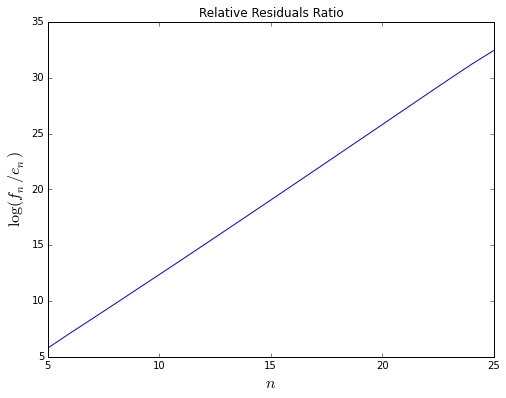

In [18]:
plt.figure(figsize = (8,6))
log_er_plot = plt.plot(nrange,log_er, label ='$\log (f_n/e_n)$')
plt.title('Relative Residuals Ratio')
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$\log (f_n/e_n)$', fontsize=16)
plt.show()

Based on the plot of $\log\left(f_n \bigr / e_n\right)$ vs $n$, we can say that the two variables are related linearly:
$$\log \left(f_n \big / e_n\right) = m n + b$$
thus:
$$f_n \big / e_n = e^{mn + b}$$
and:
$$f_n \big / e_n \propto e^{mn}$$
Hence:
$$C = e^m$$
and:
$$\log\left(C\right) = m, \quad \text{the slope of  } \log \left(f_n \big / e_n\right) = m n + b$$

This means that the ratio $\log\left(f_n \bigr / e_n\right)$ scales exponentially with respect to $n$.

***Estimate $\log\left(C\right)$ with the average rate of change:***
$$\frac{\log\left(f_{25} \bigr / e_{25}\right) - \log\left(f_{5} \bigr / e_{5}\right)}{25 - 5}$$


In [19]:
m = (log_er[-1] - log_er[0])/(nrange[-1] - nrange[0])
print '\n'
print 'log(C) estimate: {}'.format(m)
print '\n'
print 'C estimate: {}'.format(numpy.exp(m))



log(C) estimate: 1.33463732498


C estimate: 3.79861803271


This shows that $f_n \big / e_n$ scales approximately at a rate of $e^{3.8n}$ or $\approx e^{4n}$ 

### Part e)

Using $\left(A + \delta A\right) x = b$:

$$\|Ax - b\| = \|Ax - \left(A + \delta A\right)x\|$$

$$=\|\left(\delta A\right)x\|$$

Given $\left(\delta A\right)x \approx \left(\delta A\right) A^{-1}b$ and $\|Ax - b\| = \|\left(\delta A\right)x\|$, then:

$$\frac{\|Ax - b\|}{b} \approx \frac{\|\left(\delta A\right)A^{-1}b\|}{\|b\|}$$

$$ = \frac{\|\left(\delta A\right)A^{-1}b\|}{\|b\|} \frac{\|A\|}{\|\delta A\|} \frac{\|\delta A\|}{\|A\|}$$

By consistency:

$$\approx \frac{\|\delta A\| \|A^{-1}\| \|b\|}{\|b\|} \frac{\|A\|}{\|\delta A\|} \frac{\|\delta A\|}{\|A\|}$$

$$ = \|A^{-1}\| \|A\|\frac{\|\delta A\|}{\|A\|}$$

$$\approx \kappa_2\left(A\right) \epsilon_M \frac{\|A\|}{\|A\|}$$

$$= \kappa_2\left(A\right) \epsilon_M$$

***To estimate $e_n$ in terms of $\kappa_2\left(A\right)$, first define a function to calculate this condition number for $A$:***

In [20]:
def cn(A):
    return norm(inv(A)) * norm(A)

***Estimate $e_n$:***

In [21]:
ens2 = []
for n in range(5,26):
    A = pmatrix(n)
    ens2.append(cn(A) * epsilon)

In [22]:
rr2 = DataFrame.from_dict({'$e_n$':ens2})
rr2.index = range(5,26)
rr2

,$e_n$
5,5.304868e-14
6,1.182495e-13
7,2.583643e-13
8,5.569197e-13
9,1.188721e-12
10,2.518267e-12
11,5.303214e-12
12,1.111421e-11
13,2.319954e-11
14,4.826324e-11


### Part f)

To show $\|Ax-b\| = \|A^{-T}\|\left(\delta A\right)x\|$:

Solve $\left(A^{T}A + \delta A\right)x = A^T b$ for $b$:

$$b = A^{-T}\left(A^T A + \delta A\right)x$$

Substituting $b$:

$$\|Ax - A^{-T}\left(A^T A + \delta A\right)x\|$$

$$= \|Ax - Ax - A^{-T}\left(\delta A\right)x\|$$

$$=\|A^{-T}\left(\delta A\right)x\|$$

which is what we set out to show.

Now, given that $\left(\delta A\right)x \approx \left(\delta A\right)\left(A^T A\right)^{-1}A^T b$ and $\|A^T b\| \approx \|b\|$, we can write the following approximation:

$$\frac{\|Ax - b\|}{\|b\|} \approx \frac{\|A^{-T} \left(\delta A\right)\left(A^T A\right)^{-1}A^T b\|}{\|A^T b\|}$$

$$ = \frac{\|A^{-T} \left(\delta A\right)\left(A^T A\right)^{-1}A^T b\|}{\|A^T b\|} \frac{\|A^T A\|}{\|\delta A\|} \frac{\|\delta A\|}{\|A^T A\|}$$

$$ \approx \frac{\|A^{-T}\| \|\left(\delta A\right)\| \|\left(A^T A\right)^{-1}\| \|A^T b\|}{\|A^T b\|} \frac{\|A^T A\|}{\|\delta A\|} \frac{\|\delta A\|}{\|A^T A\|}$$

$$ = \|A^{-T}\| \|\left(A^T A\right)^{-1}\| \|A^T A\| \frac{\|\delta A\|}{\|A^T A\|}$$

$$ \approx \|A^{-T}\| \kappa_2\left(A^T A\right) \epsilon_M \frac{\|A^T A\|}{\|A^T A\|}$$

$$ \approx \|A^{-T}\| \left[\kappa_2\left(A\right)\right]^2 \epsilon_M $$

$$ \approx \|A^{-T}\| \left(2^n\right)^2 \epsilon_M $$

$$ \approx \|A^{-T}\| 4^{n} \epsilon_M $$

***Produce the estimate of $f_n$ based on $\|A^{-T}\| \left[\kappa_2\left(A\right)\right]^2 \epsilon_M $:***

In [23]:
fns2 = []
for n in range(5,26):
    A = pmatrix(n)
    fns2.append(norm(inv(A)) * cn(A)**2 * epsilon)

In [24]:
rf2 = DataFrame.from_dict({'$f_n$':fns2})
rf2.index = range(5,26)
rf2

,$f_n$
5,1.101241e-10
6,1.096175e-09
7,1.047093e-08
8,9.731838e-08
9,8.867814e-07
10,7.959660e-06
11,7.059934e-05
12,6.201683e-04
13,5.404327e-03
14,4.677845e-02


### Part g)

***Produce the estimate of $f_n\big /e_n$ based on parts e and f:***

In [25]:
rfe = [fns2[n]/ens2[n] for n in xrange(len(fns2))]

In [26]:
rfr = DataFrame.from_dict({'$f_n / e_n$':rfe})
rfr.index = range(5,26)
rfr

,$f_n / e_n$
5,2.075907e+03
6,9.270017e+03
7,4.052776e+04
8,1.747440e+05
9,7.459960e+05
10,3.160769e+06
11,1.331256e+07
12,5.579961e+07
13,2.329497e+08
14,9.692355e+08


The first thing to notice is that the ratio blows up and becomes very large as $n$ increases. This is expected as in the normal equations method $f_n$ scales by a factor of $\|A^{-T}\|$ as we as $\left[\kappa_2\left(A\right)\right]^2 \approx 4^n$, which clearly make the ratio $f_n \big / e_n$ blow up with even small changes in $n$.